# Facial Recognition Models Using Transfer Learning

The application of computer vision for facial recognition has been a widely used technology in recent years. Platforms such as Google Images and Facebook utilize facial recognition for various purposes. Using the FastAI library for transfer learning, a dataset of facial expressions labeled into five different categories was used as the training set to correctly classify image data of faces. Using pretrained deep learning architectures, transfer learning was performed to add a final dense layer to build two models, one based on ResNet34 and the other on VGG19. Exploratory data analysis was then done on resulting metrics. 

1. Import Libraries
2. Load Image Data
3. ResNet34 Model
4. VGG19 Model

### Import Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from fastai import *
from fastai.vision.all import *

import pickle as pkl
import warnings
warnings.filterwarnings('ignore')

### Load Image Data

In [2]:
# set file path

x  = '../Facial Recognition/dataset'
path = Path(x)
path.ls()

(#5) [Path('../Facial Recognition/dataset/Angry'),Path('../Facial Recognition/dataset/Happy'),Path('../Facial Recognition/dataset/Neutral'),Path('../Facial Recognition/dataset/Sad'),Path('../Facial Recognition/dataset/Surprise')]

In [3]:
# define data augmentations

aug_transforms_list = aug_transforms(
    flip_vert=True,        # Enable vertical flipping
    max_rotate=30.0,       # Maximum rotation in degrees
    max_zoom=1.1,          # Maximum zoom
    max_lighting=0.2,      # Maximum lighting changes
    max_warp=0.2,          # Maximum warping
    p_affine=0.75,         # Probability of applying affine transforms
    p_lighting=0.75        # Probability of applying lighting transforms
)

In [4]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224), batch_tfms=aug_transforms_list)

In [5]:
print('Number of classes:', dls.c)

Number of classes: 5


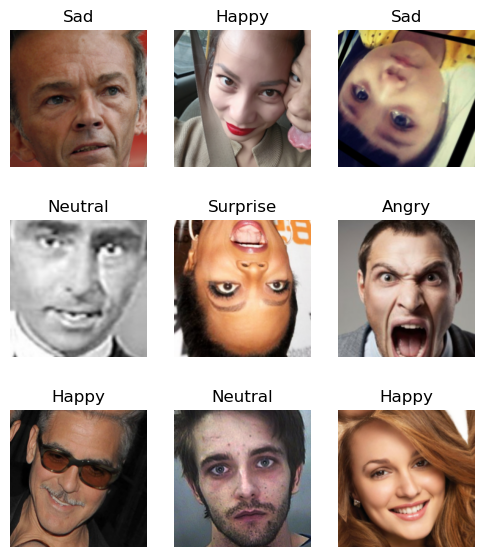

In [6]:
dls.show_batch(max_n=9, figsize=(6, 7))

### ResNet34 Model

In [7]:
learn_resnet = cnn_learner(dls, resnet34, metrics=accuracy, cbs=[EarlyStoppingCallback(monitor='accuracy', patience=3)])

In [8]:
learn_resnet.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.714331,1.155705,0.560899,38:03


epoch,train_loss,valid_loss,accuracy,time
0,1.035992,0.812797,0.684451,51:40
1,0.785070,0.620490,0.760969,47:25
2,0.671556,0.565982,0.774307,1:23:15


In [9]:
learn_resnet.export(Path('../models/resnet.pkl'))
learn_resnet.model_dir = '/Facial Recognition/models/'
learn_resnet.save('resnet.pth')

Path('/Facial Recognition/models/resnet.pth.pth')

In [14]:
learn_resnet = load_learner('../Facial Recognition/models/resnet.pkl')

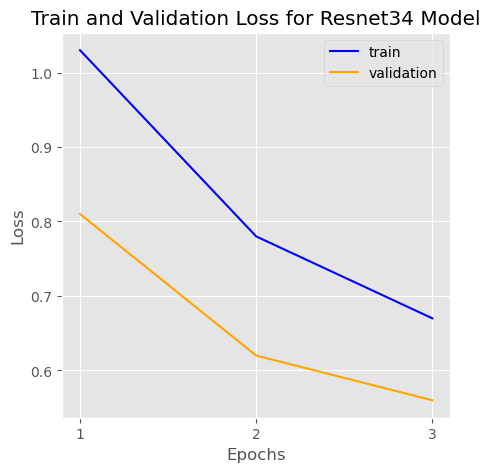

In [45]:
epoch = [1, 2, 3]
train_loss = [1.03, 0.78, 0.67]
valid_loss = [0.81, 0.62, 0.56]
data = {'epoch':epoch, 'train_loss':train_loss, 'valid_loss':valid_loss}
resnet_loss = pd.DataFrame(data, columns=['epoch', 'train_loss', 'valid_loss'])

fig = plt.figure(figsize=(5,5))
plt.plot(resnet_loss['epoch'], resnet_loss['train_loss'], color='blue', label='train')
plt.plot(resnet_loss['epoch'], resnet_loss['valid_loss'], color='orange', label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss for Resnet34 Model')
plt.xticks([1, 2, 3])
plt.legend()
plt.show()

In [11]:
learn_resnet.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [15]:
interp_resnet = ClassificationInterpretation.from_learner(learn_resnet)

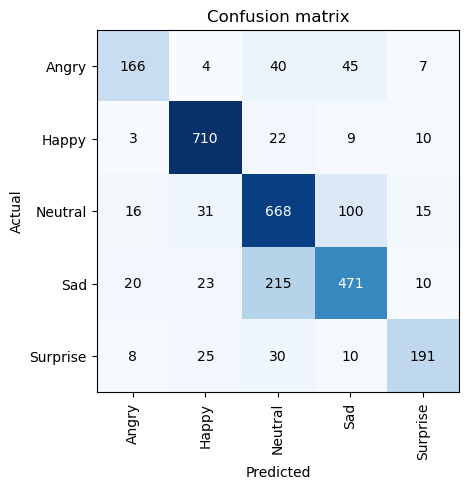

In [16]:
interp_resnet.plot_confusion_matrix()

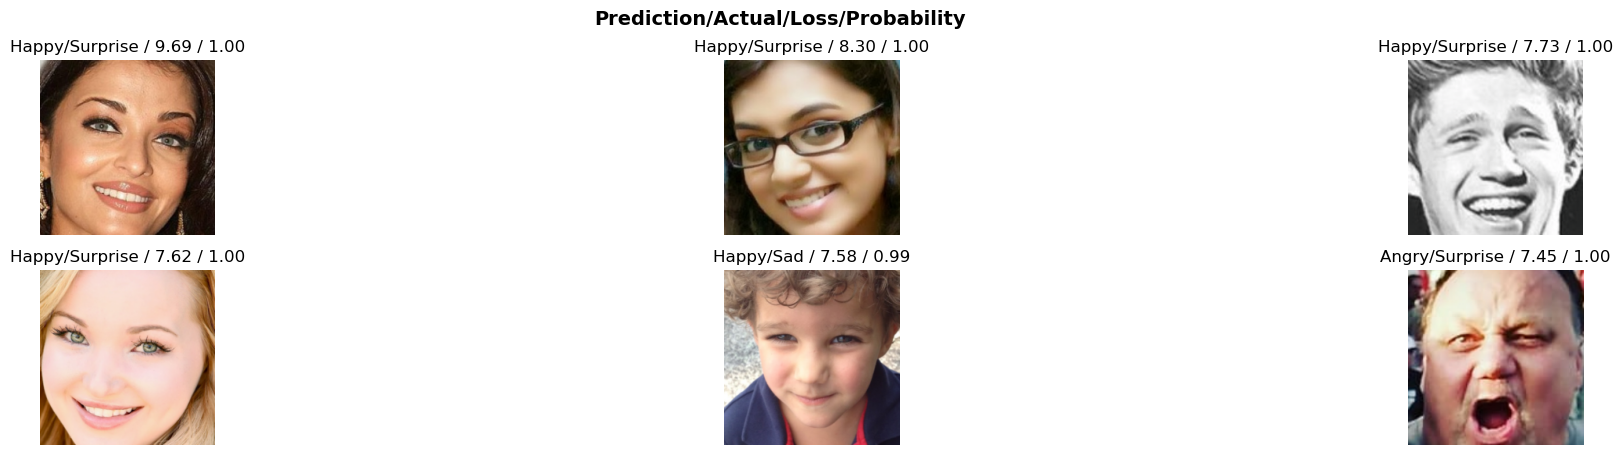

In [17]:
interp_resnet.plot_top_losses(6,figsize = (25,5))

### VGG19 Model

In [20]:
learn_vgg = cnn_learner(dls, vgg19_bn, metrics=accuracy, cbs=[EarlyStoppingCallback(monitor='accuracy', patience=3)])

In [21]:
learn_vgg.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.697992,1.197755,0.522991,2:29:58


epoch,train_loss,valid_loss,accuracy,time
0,1.025988,0.737682,0.713233,3:17:59
1,0.774489,0.595573,0.759916,10:15:29
2,0.619777,0.555484,0.783082,3:44:58


In [22]:
learn_vgg.export(Path('../models/vgg.pkl'))
learn_vgg.model_dir = '/Facial Recognition/models/'
learn_vgg.save('vgg.pth')

Path('/Facial Recognition/models/vgg.pth.pth')

In [29]:
learn_vgg = load_learner('../Facial Recognition/models/vgg.pkl')

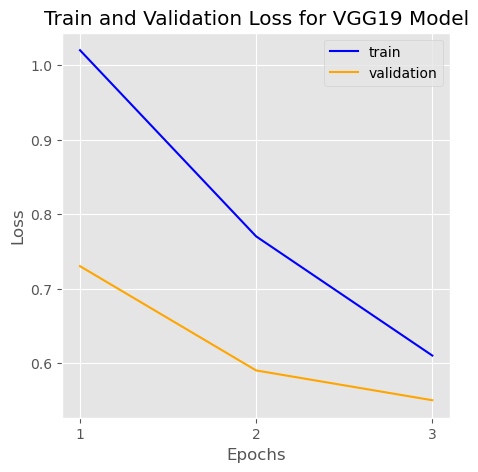

In [46]:
epoch = [1, 2, 3]
train_loss = [1.02, 0.77, 0.61]
valid_loss = [0.73, 0.59, 0.55]
data = {'epoch':epoch, 'train_loss':train_loss, 'valid_loss':valid_loss}
vgg_loss = pd.DataFrame(data, columns=['epoch', 'train_loss', 'valid_loss'])

fig = plt.figure(figsize=(5,5))
plt.plot(vgg_loss['epoch'], vgg_loss['train_loss'], color='blue', label='train')
plt.plot(vgg_loss['epoch'], vgg_loss['valid_loss'], color='orange', label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss for VGG19 Model')
plt.xticks([1, 2, 3])
plt.legend()
plt.show()

In [23]:
learn_vgg.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilat

In [26]:
interp_vgg = ClassificationInterpretation.from_learner(learn_vgg)

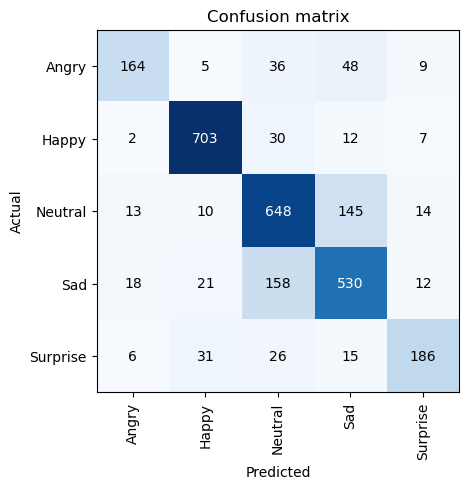

In [25]:
interp_vgg.plot_confusion_matrix()

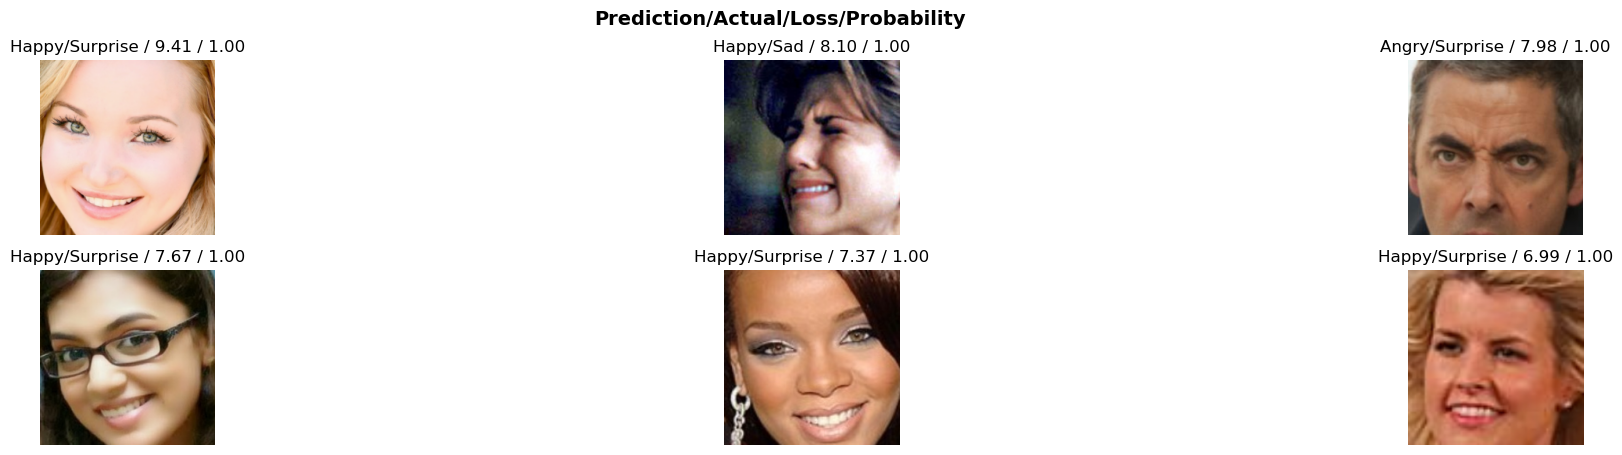

In [27]:
interp_vgg.plot_top_losses(6,figsize = (25,5))